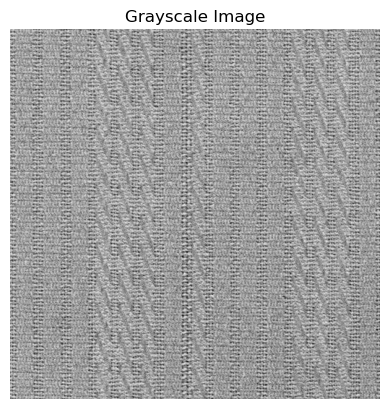

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


with Image.open("0015.jpg") as img:
    rgba_img = img.convert('RGBA')
    rgba_array = np.array(rgba_img)
    rgb_array = rgba_array[:, :, :3]
    image = np.mean(rgb_array, axis=2, dtype=int)

plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  
plt.show()


1. Suppose we are interested in the pixel value distribution of our image. Draw the histogram of the pixel values. Provide an appropriate probability distribution that fits well to the shape you observe (i.e. is it like Normal distribution, uniform or other?).

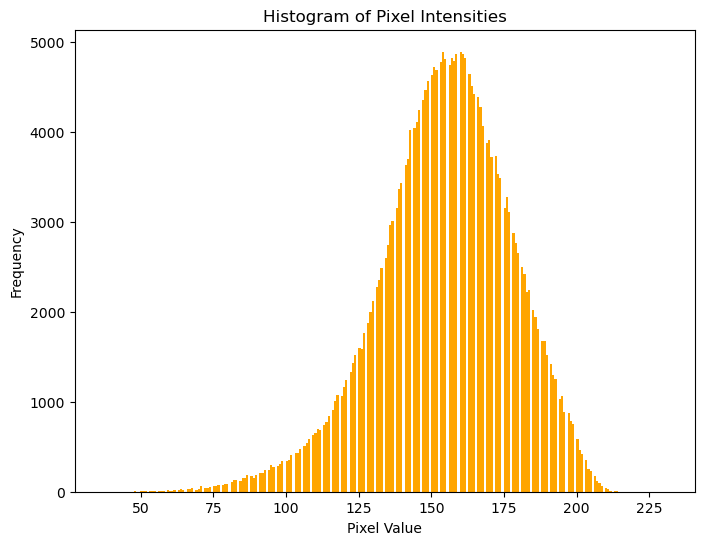

In [20]:
pixels = image.flatten()
        
plt.figure(figsize=(8, 6))
plt.hist(pixels, bins=256, color='orange')   
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensities')
plt.show()

2. Assume that pixel values are following the distribution you have proposed in the previous task. Estimate the parameters using the data. (i.e. mean and variance for Normal distribution or min and max for uniform distribution and etc.).

In [21]:
mean = np.mean(pixels)
std = np.std(pixels)
print(mean , std)

154.56247329711914 22.80382725188316


3. Let’s say the pixel values follow the distribution you proposed and its parameters are equal to what you have estimated in part 2. Identify the pixels that are out of the 0.001 probability limits. In other words, find a lower and upper bound that leave 0.001 of the observations on the smaller and larger side of the distribution respectively. Pixels that are out of these bounds should be identified. After finding those pixels, change the value of these pixels to zero (i.e. black color). Display the new image and original image in a plot. What are your observations? Comment on your findings.

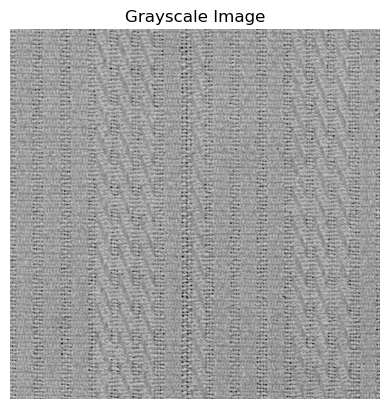

In [22]:
from scipy.stats import norm

altered_pixels = pixels
lower_limit_z = norm.ppf(0.001, loc=mean, scale=std)
upper_limit_z = norm.ppf(0.999, loc=mean, scale=std)

large_outliers = pixels[pixels > upper_limit_z]
small_outliers = pixels[pixels < lower_limit_z]

altered_pixels[pixels > upper_limit_z] = 0
altered_pixels[pixels < lower_limit_z] = 0

altered_pixels = np.reshape(pixels,(512, 512))
plt.imshow(altered_pixels, cmap='gray',vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off') 
plt.show()

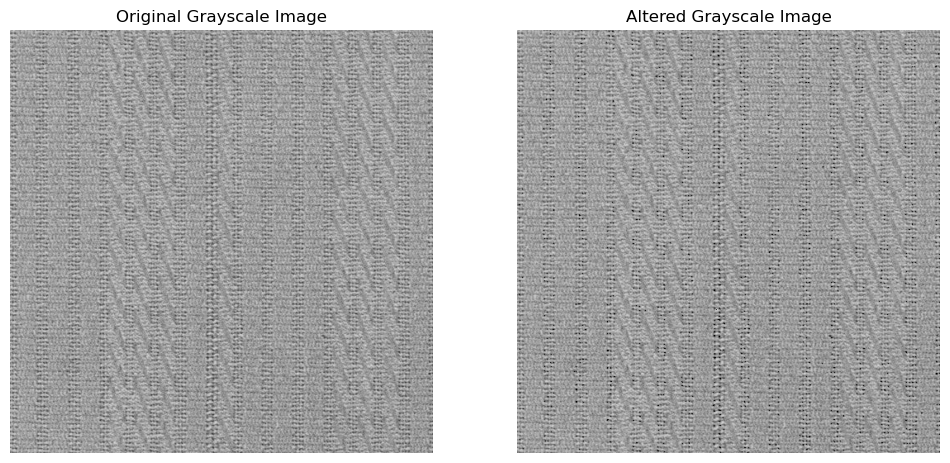

In [23]:

altered_image = np.reshape(altered_pixels,(512, 512))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

axes[0].imshow(image, cmap='gray',vmin=0, vmax=255)  
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off') 

axes[1].imshow(altered_image, cmap='gray',vmin=0, vmax=255)  
axes[1].set_title('Altered Grayscale Image')
axes[1].axis('off')  

plt.show()

4. Suppose we would like to perform the same operation on the patches of images (i.e. windows of certain size). When local structures are important, performing image operations on the patches might be important. Assume that your window size is 51x51 and you repeated what you have done in the first three tasks. Note that you do not need to draw each patch as requested in the previous task (i.e. task 3) but you are expected to mark the pixels for every patch. After finding those pixels, change the value of these pixels to zero (i.e. black color). Display the new image and original image in a plot. What are your observations? Comment on your findings.


In [24]:
blocks = []
for i in range(0, 461, 51):
    for j in range(0, 461, 51):
        
        block = image[i:i + 51, j:j + 51]
        
        
        blocks.append(block)



In [25]:
mean_list = []
std_list = []
altered_blocks = []
for i in blocks:
    i = i.flatten()
    mean = np.mean(i)
    std = np.std(i)
    mean_list.append(mean)
    std_list.append(std)
    lower_limit_z = norm.ppf(0.001, loc=mean, scale=std)
    upper_limit_z = norm.ppf(0.999, loc=mean, scale=std)
    large_outliers = i[i > upper_limit_z]
    small_outliers = i[i < lower_limit_z]
    altered_i = i
    altered_i[i > upper_limit_z] = 0
    altered_i[i < lower_limit_z] = 0
    altered_i = np.reshape(altered_i,(51,51))
    altered_blocks.append(altered_i)



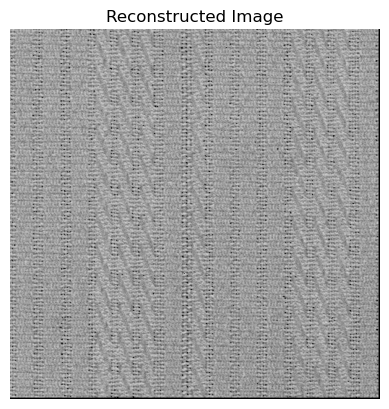

In [26]:
import numpy as np

reconstructed_image = np.zeros((512, 512), dtype=np.uint8)

# Iterate through the 10x10 grid of patches and place each processed patch back into its original position
patch_size = 51
num_patches = 10  # Assuming you have a 10x10 grid of patches

for i in range(num_patches):
    for j in range(num_patches):
        # Calculate the starting and ending indices for placing the patch back into the 512x512 grid
        start_row = i * patch_size
        end_row = start_row + patch_size
        start_col = j * patch_size
        end_col = start_col + patch_size
        
        # Get the processed patch from 'altered_blocks' (or your list containing processed patches)
        processed_patch = altered_blocks[i * num_patches + j]  # Assuming altered_blocks is a flattened list
        
        # Check if the processed_patch has the expected shape (51, 51)
        if processed_patch.shape != (51, 51):
            raise ValueError(f"The shape of the processed_patch at index {(i, j)} is not (51, 51).")
        
        # Place the processed patch back into its original position in the reconstructed image
        reconstructed_image[start_row:end_row, start_col:end_col] = processed_patch

# At this point, 'reconstructed_image' contains the full 512x512 image reconstructed from the processed patches

# Optionally, you can visualize the reconstructed image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(reconstructed_image, cmap='gray',vmin=0, vmax=255)
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


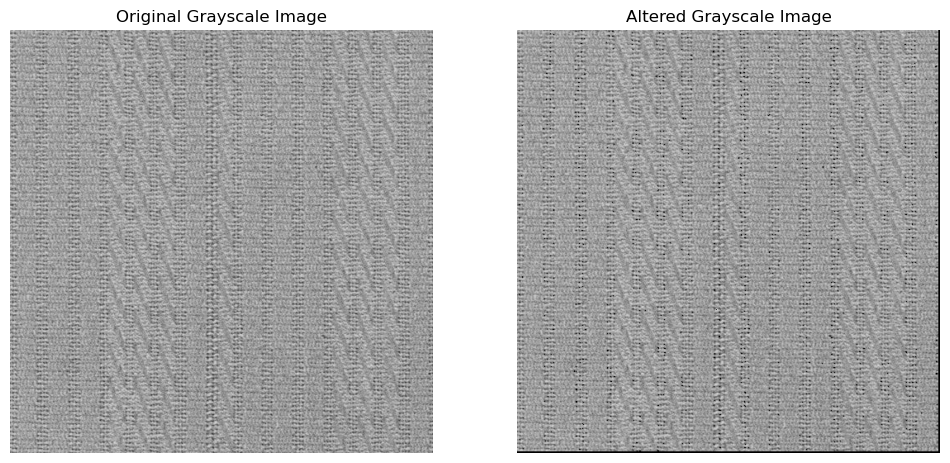

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

axes[0].imshow(image, cmap='gray',vmin=0, vmax=255)  
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off') 

axes[1].imshow(reconstructed_image, cmap='gray',vmin=0, vmax=255)  
axes[1].set_title('Altered Grayscale Image')
axes[1].axis('off')  

plt.show()